In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
os.listdir()

['v2_evaluate_model.py',
 '.DS_Store',
 'LUADLUSC_beta_analysis_run2.csv',
 'LUADLUSC_beta_analysis_run1.csv',
 'beta_analysis.csv',
 'LUADLUSC_beta_analysis.csv',
 'parallel_kfold_array_beta_analysis.py',
 'output',
 'plot_beta_epoch_analysis.ipynb',
 '.ipynb_checkpoints']

In [3]:
df = pd.read_csv('LUADLUSC_beta_analysis.csv')
df = df[df.beta > 0]
df = df.drop_duplicates(subset=['beta', 'epoch', 'k'], keep='last')
print(df.shape)
df.head()

(1299, 14)


,beta,epoch,mae,multi_mae,average_variance,prop_90,prop_95,prop_99,prop_80,prop_80q,prop_90q,prop_95q,prop_99q,k
0,0.1,5.0,0.679225,0.639022,0.208043,0.633253,0.714462,0.832777,0.520868,0.514150,0.621394,0.696630,0.790347,2.0
1,0.1,5.0,0.669412,0.632818,0.193551,0.621999,0.703688,0.822459,0.509802,0.503244,0.610556,0.685236,0.780313,1.0
2,0.1,5.0,0.700550,0.664572,0.207310,0.608105,0.688959,0.809088,0.499010,0.492279,0.597157,0.671184,0.766675,0.0
3,0.1,5.0,0.679263,0.639025,0.204534,0.631263,0.713078,0.831361,0.518370,0.511990,0.619917,0.695269,0.790122,3.0
4,0.1,10.0,0.590044,0.584526,0.129439,0.537070,0.617367,0.745002,0.433834,0.428008,0.525747,0.598876,0.698738,2.0


In [4]:
df.beta.value_counts()

0.10     254
0.50     233
1.00     227
1.25     141
2.00      75
1.75      74
1.50      62
2.50      53
4.00      37
6.00      37
3.00      35
5.00      34
8.00      16
12.00     13
16.00      8
Name: beta, dtype: int64

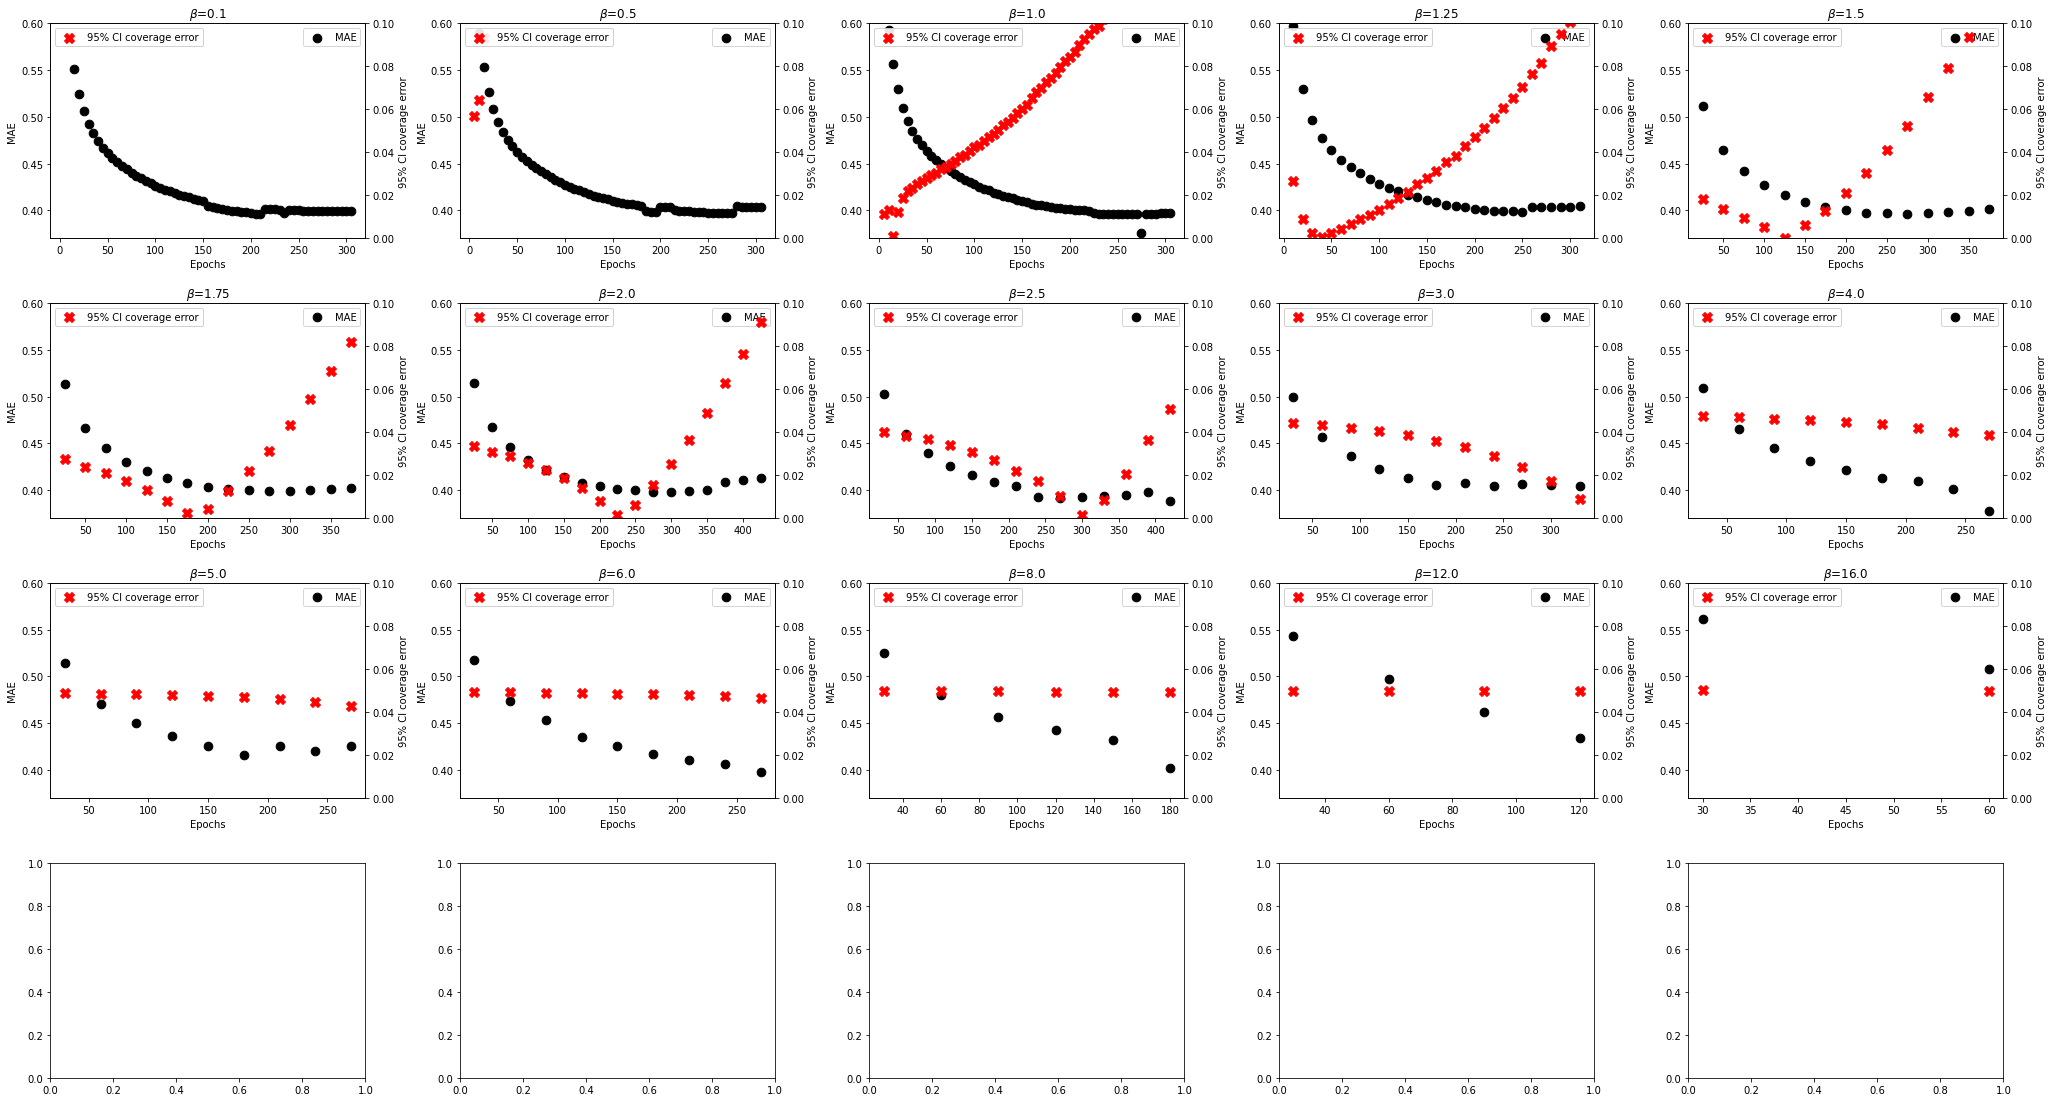

In [11]:
# run on the LUNG DATA (22-03-2023 11:16)
cols = 4
rows = 5
i = j = 0
fig, axs = plt.subplots(cols, rows, figsize=(35, 19.4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

betas = sorted(df.beta.unique())
for i in range(cols):
    for j in range(rows):
        bet_ix = i * rows + j
        if bet_ix >= len(betas):
            break
        beta = betas[bet_ix]
        one_beta = df[df.beta==beta].groupby('epoch').mean()
        one_beta['epoch'] = one_beta.index
        x = one_beta.epoch.values
        y = one_beta.multi_mae.values
        axs[i,j].set_ylim([0.37, 0.6])
        axs[i,j].scatter(x,y, label='MAE', s=75, marker='o', c='black')
#         axs[i,j].set_title('beta=' + str(beta))
        axs[i,j].set_title(r'$\beta$=' + str(beta))
        ax2=axs[i,j].twinx()
        ax2.set_ylim([-0.00, 0.1])
        ax2.grid(False)
        y2 = abs(one_beta.prop_95q.values - 0.95)
        ax2.scatter(x, y2, c='red', label='95% CI coverage error', marker='X', s=100)
        axs[i,j].legend()
        axs[i,j].set_ylabel('MAE')
        axs[i,j].set_xlabel('Epochs')
        ax2.set_ylabel('95% CI coverage error')
        ax2.legend(loc='upper left', framealpha=0.9)

In [14]:
df.columns

Index(['beta', 'epoch', 'mae', 'multi_mae', 'average_variance', 'prop_90',
       'prop_95', 'prop_99', 'prop_80', 'prop_80q', 'prop_90q', 'prop_95q',
       'prop_99q', 'k'],
      dtype='object')

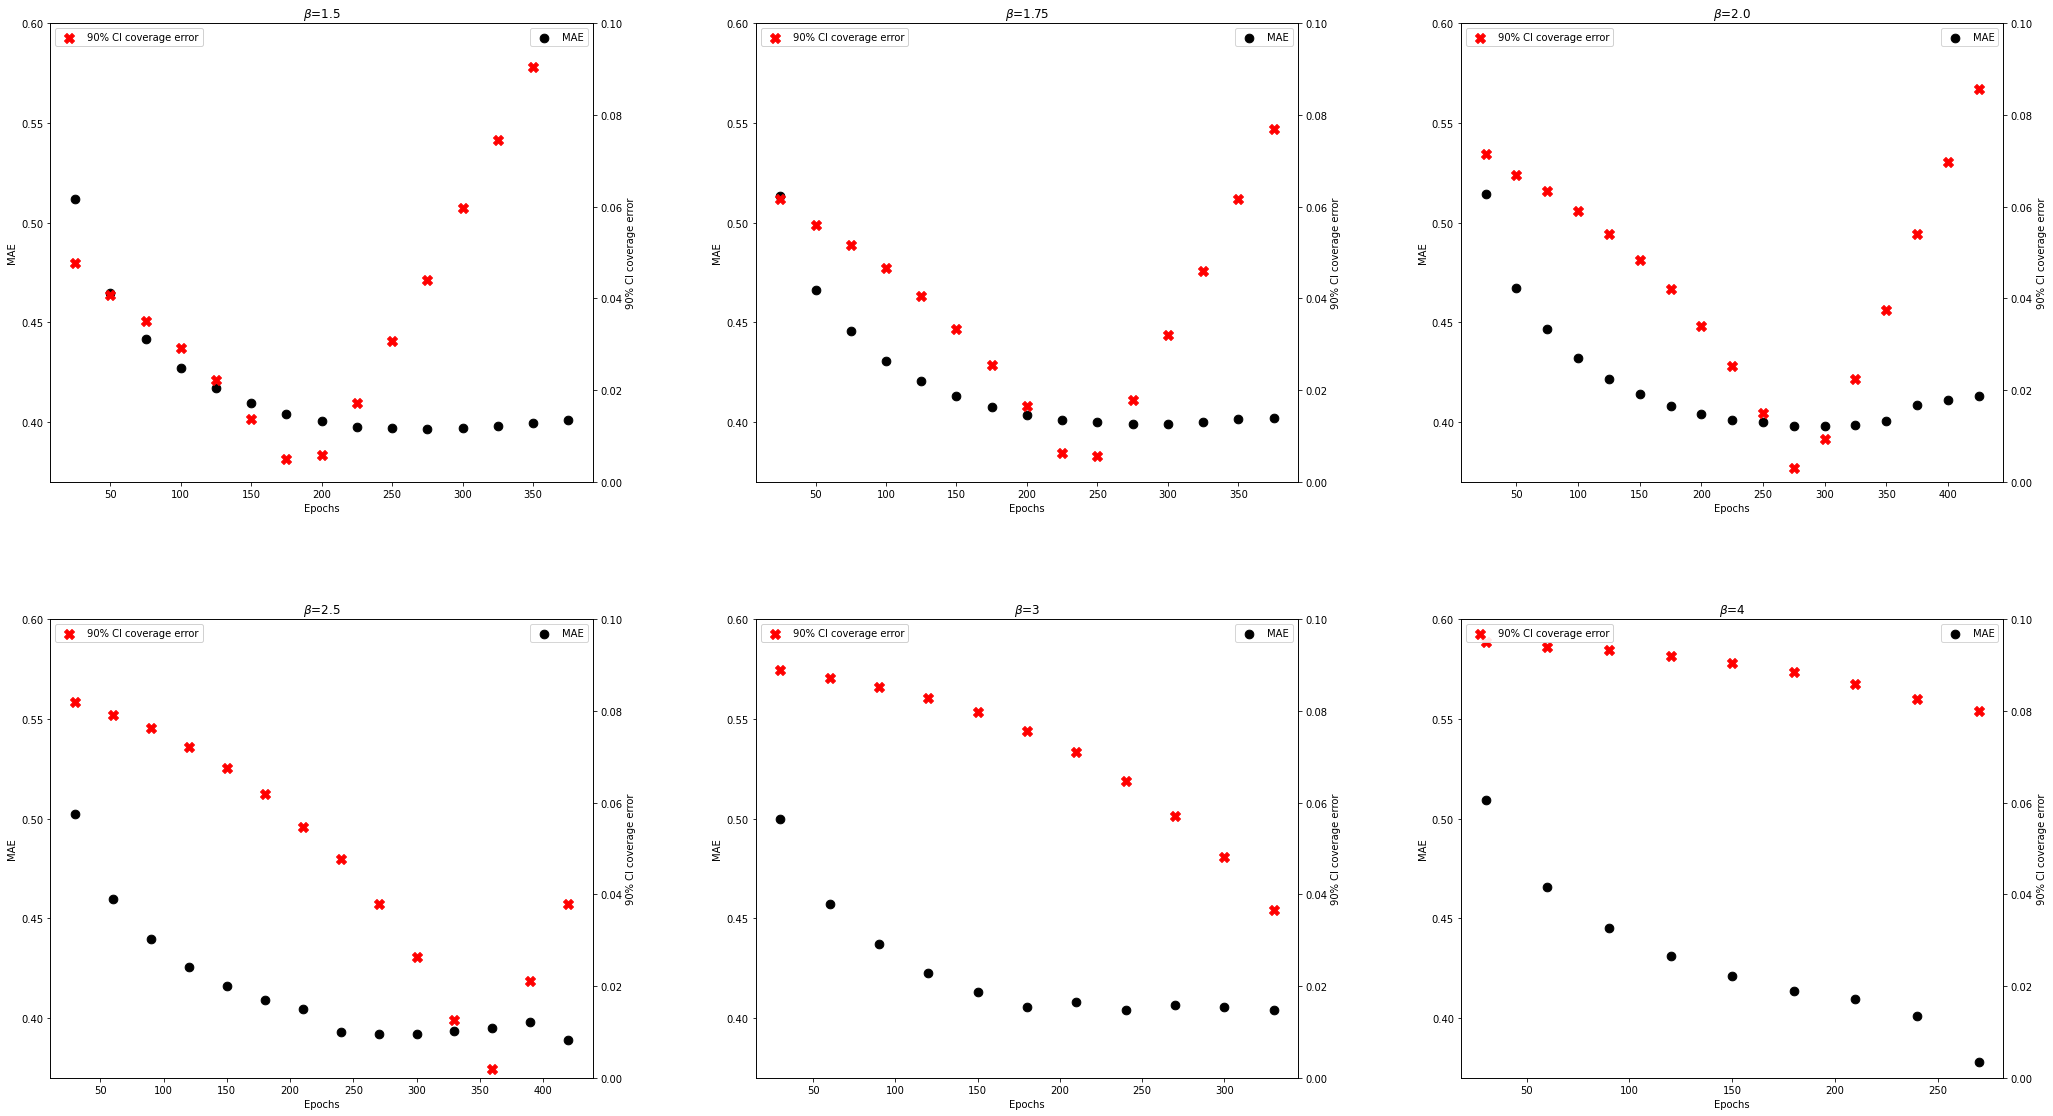

In [17]:
### run on the LUNG DATA (22-03-2023 11:16)
cols = 2
rows = 3
i = j = 0
fig, axs = plt.subplots(cols, rows, figsize=(35, 19.4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

betas = [1.5, 1.75, 2.0, 2.5, 3, 4, 5]
for i in range(cols):
    for j in range(rows):
        bet_ix = i * rows + j
        if bet_ix >= len(betas):
            break
        beta = betas[bet_ix]
        one_beta = df[df.beta==beta].groupby('epoch').mean()
        one_beta['epoch'] = one_beta.index
        x = one_beta.epoch.values
        y = one_beta.multi_mae.values
        axs[i,j].set_ylim([0.37, 0.6])
        axs[i,j].scatter(x,y, label='MAE', s=75, marker='o', c='black')
#         axs[i,j].set_title('beta=' + str(beta))
        axs[i,j].set_title(r'$\beta$=' + str(beta))
        ax2=axs[i,j].twinx()
        ax2.set_ylim([-0.00, 0.1])
        ax2.grid(False)
        y2 = abs(one_beta.prop_90.values - 0.90)
        ax2.scatter(x, y2, c='red', label='90% CI coverage error', marker='X', s=100)
        axs[i,j].legend()
        axs[i,j].set_ylabel('MAE')
        axs[i,j].set_xlabel('Epochs')
        ax2.set_ylabel('90% CI coverage error')
        ax2.legend(loc='upper left', framealpha=0.9)

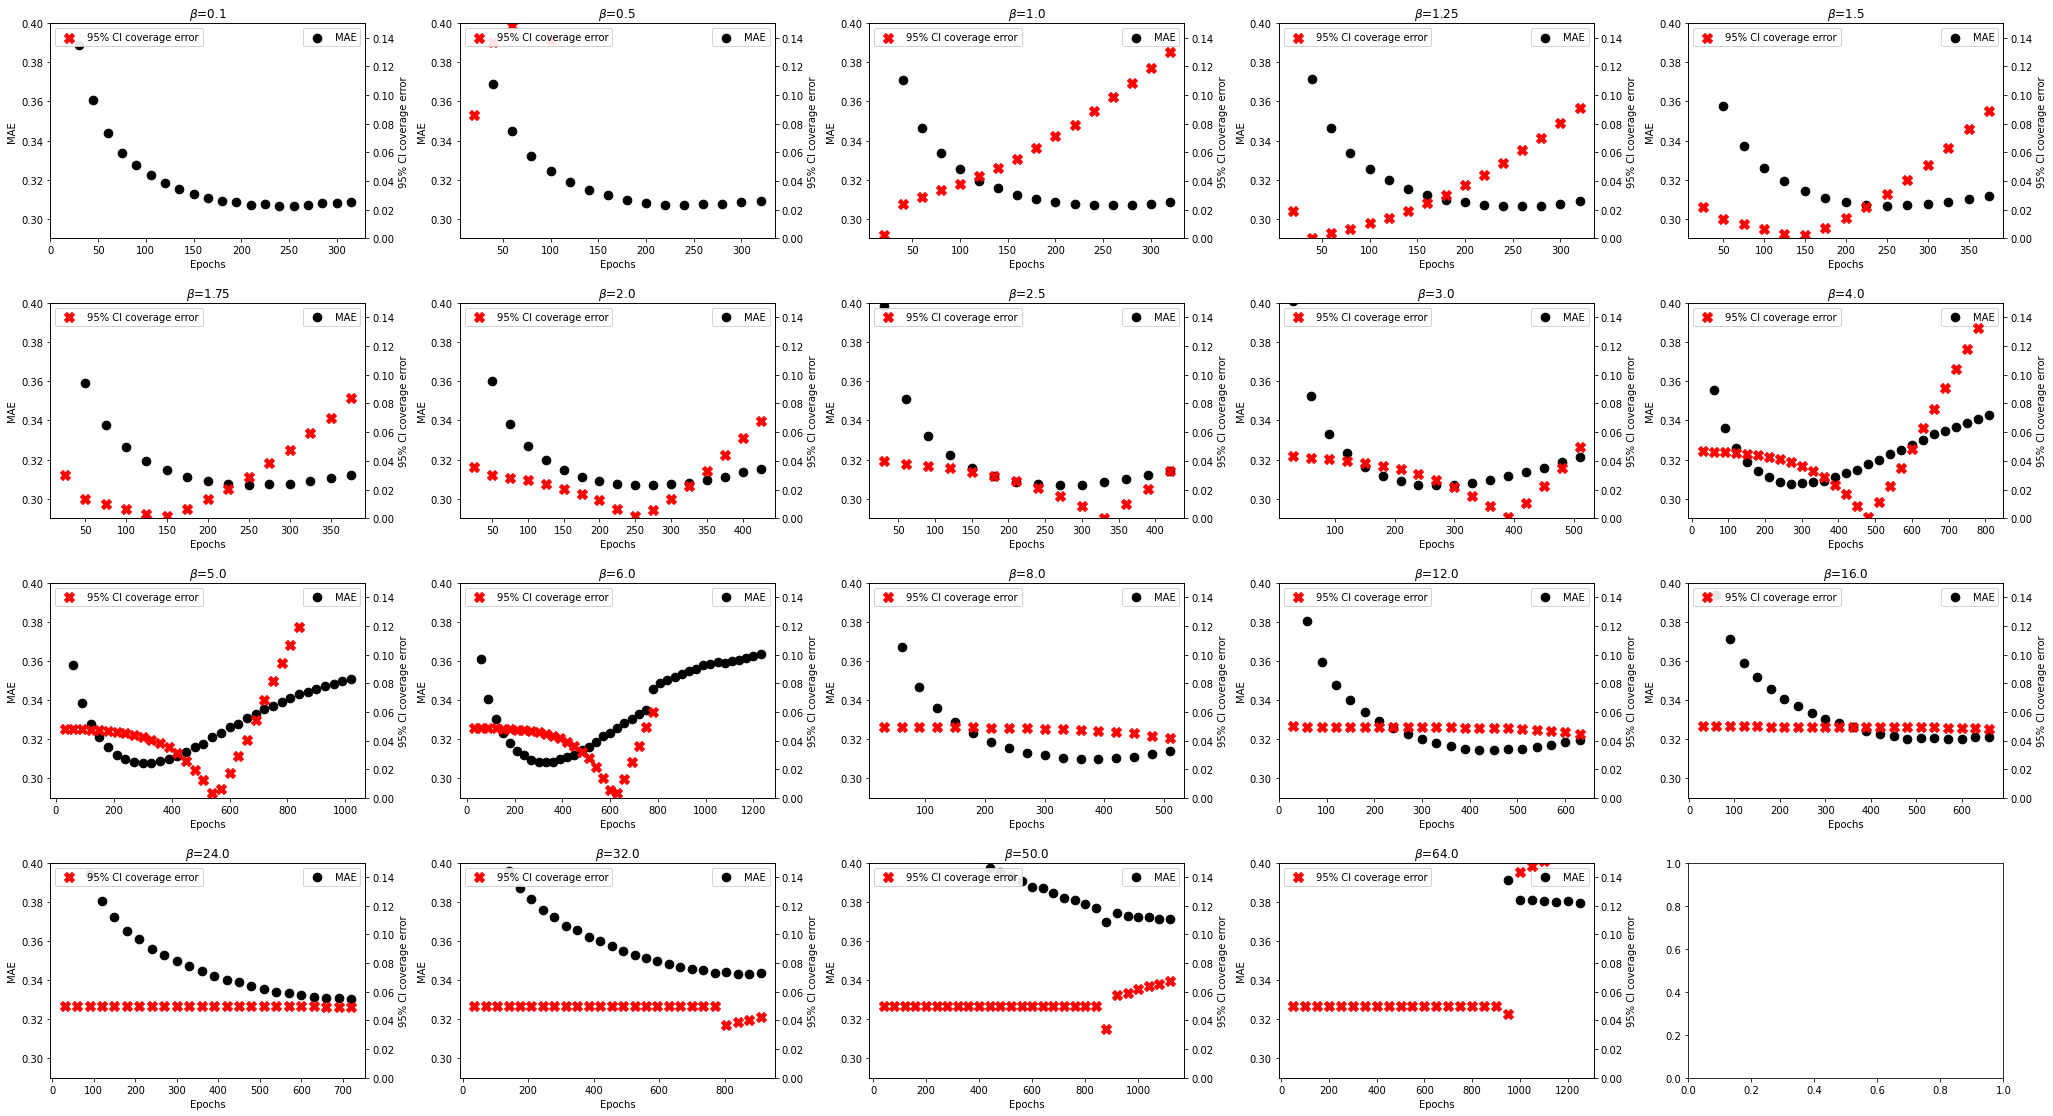

In [39]:
# run on the GLIOBLASTOMA data (when I thought it was lung)
cols = 4
rows = 5
i = j = 0
fig, axs = plt.subplots(cols, rows, figsize=(35, 19.4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

betas = sorted(df.beta.unique())
for i in range(cols):
    for j in range(rows):
        bet_ix = i * rows + j
        if bet_ix >= len(betas):
            break
        beta = betas[bet_ix]
        one_beta = df[df.beta==beta].groupby('epoch').mean()
        one_beta['epoch'] = one_beta.index
        x = one_beta.epoch.values
        y = one_beta.multi_mae.values
        axs[i,j].set_ylim([0.29, 0.4])
        axs[i,j].scatter(x,y, label='MAE', s=75, marker='o', c='black')
#         axs[i,j].set_title('beta=' + str(beta))
        axs[i,j].set_title(r'$\beta$=' + str(beta))
        ax2=axs[i,j].twinx()
        ax2.set_ylim([-0.00, 0.15])
        ax2.grid(False)
        y2 = abs(one_beta.prop_95q.values - 0.95)
        ax2.scatter(x, y2, c='red', label='95% CI coverage error', marker='X', s=100)
        axs[i,j].legend()
        axs[i,j].set_ylabel('MAE')
        axs[i,j].set_xlabel('Epochs')
        ax2.set_ylabel('95% CI coverage error')
        ax2.legend(loc='upper left', framealpha=0.9)

In [ ]:
df2 = pd.read_csv('prop_miss_analysis.csv')
rows = 3
cols = 1
props = df2.miss_col.unique()
fig, axs = plt.subplots(rows, cols, figsize=(18, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
for i in range(cols):
    for j in range(rows):
        prop = props[i * rows + j]
        one_prop = df2[df2.miss_col==prop]
        x = one_prop.epoch.values
        y = one_prop.multi_mae.values
        axs[j].set_ylim([0.29, 0.75])
        axs[j].plot(x,y, label='MAE')
        axs[j].set_title('prop=' + str(prop))
        ax2=axs[j].twinx()
        ax2.set_ylim([0, 0.1])
        y2 = abs(one_prop.prop_95.values - 0.95)
        ax2.plot(x, y2, c='red', label='95% CI coverage error')
        axs[j].legend()
        axs[j].set_ylabel('MAE')
        ax2.set_ylabel('95% CI coverage error')
        ax2.legend(loc='upper left')
plt.savefig('output/prop_and_epochs_coverage_and_mae', facecolor='white')
plt.show()

## K-fold analysis

In [2]:
df = pd.read_csv('experiments/beta_analysis_19_jul.csv')
df.head()

,beta,epoch,mae,multi_mae,average_variance,prop_90,prop_95,prop_99,k,prop_80,prop_80q,prop_90q,prop_95q,prop_99q
0,0.1,15.0,0.419956,0.419203,-0.138377,0.520858,0.599285,0.727268,4.0,0.420062,0.413828,0.510311,0.581670,0.681176
1,0.1,30.0,0.351728,0.352044,-0.982833,0.402368,0.469319,0.588297,4.0,0.318966,0.314543,0.393458,0.454002,0.544550
2,0.1,15.0,0.495713,0.494580,0.048155,0.489513,0.566235,0.695386,3.0,0.392600,0.387360,0.479924,0.549916,0.647567
3,0.1,15.0,0.497944,0.497877,0.130694,0.492584,0.567707,0.697851,0.0,0.394823,0.389868,0.482127,0.551366,0.650006
4,0.1,45.0,0.322737,0.323374,-1.200468,0.391710,0.457496,0.574554,4.0,0.309159,0.305050,0.382359,0.444131,0.532366


In [3]:
df.beta.value_counts()

32.00         352
24.00         350
6.00          345
64.00         325
16.00         311
5.00          300
4.00          286
12.00         259
2.00          255
3.00          238
0.10          238
8.00          235
1.75          220
1.00          216
2.50          210
1.25          200
1.50          198
0.50          197
50.00         171
9679988.00      1
Name: beta, dtype: int64

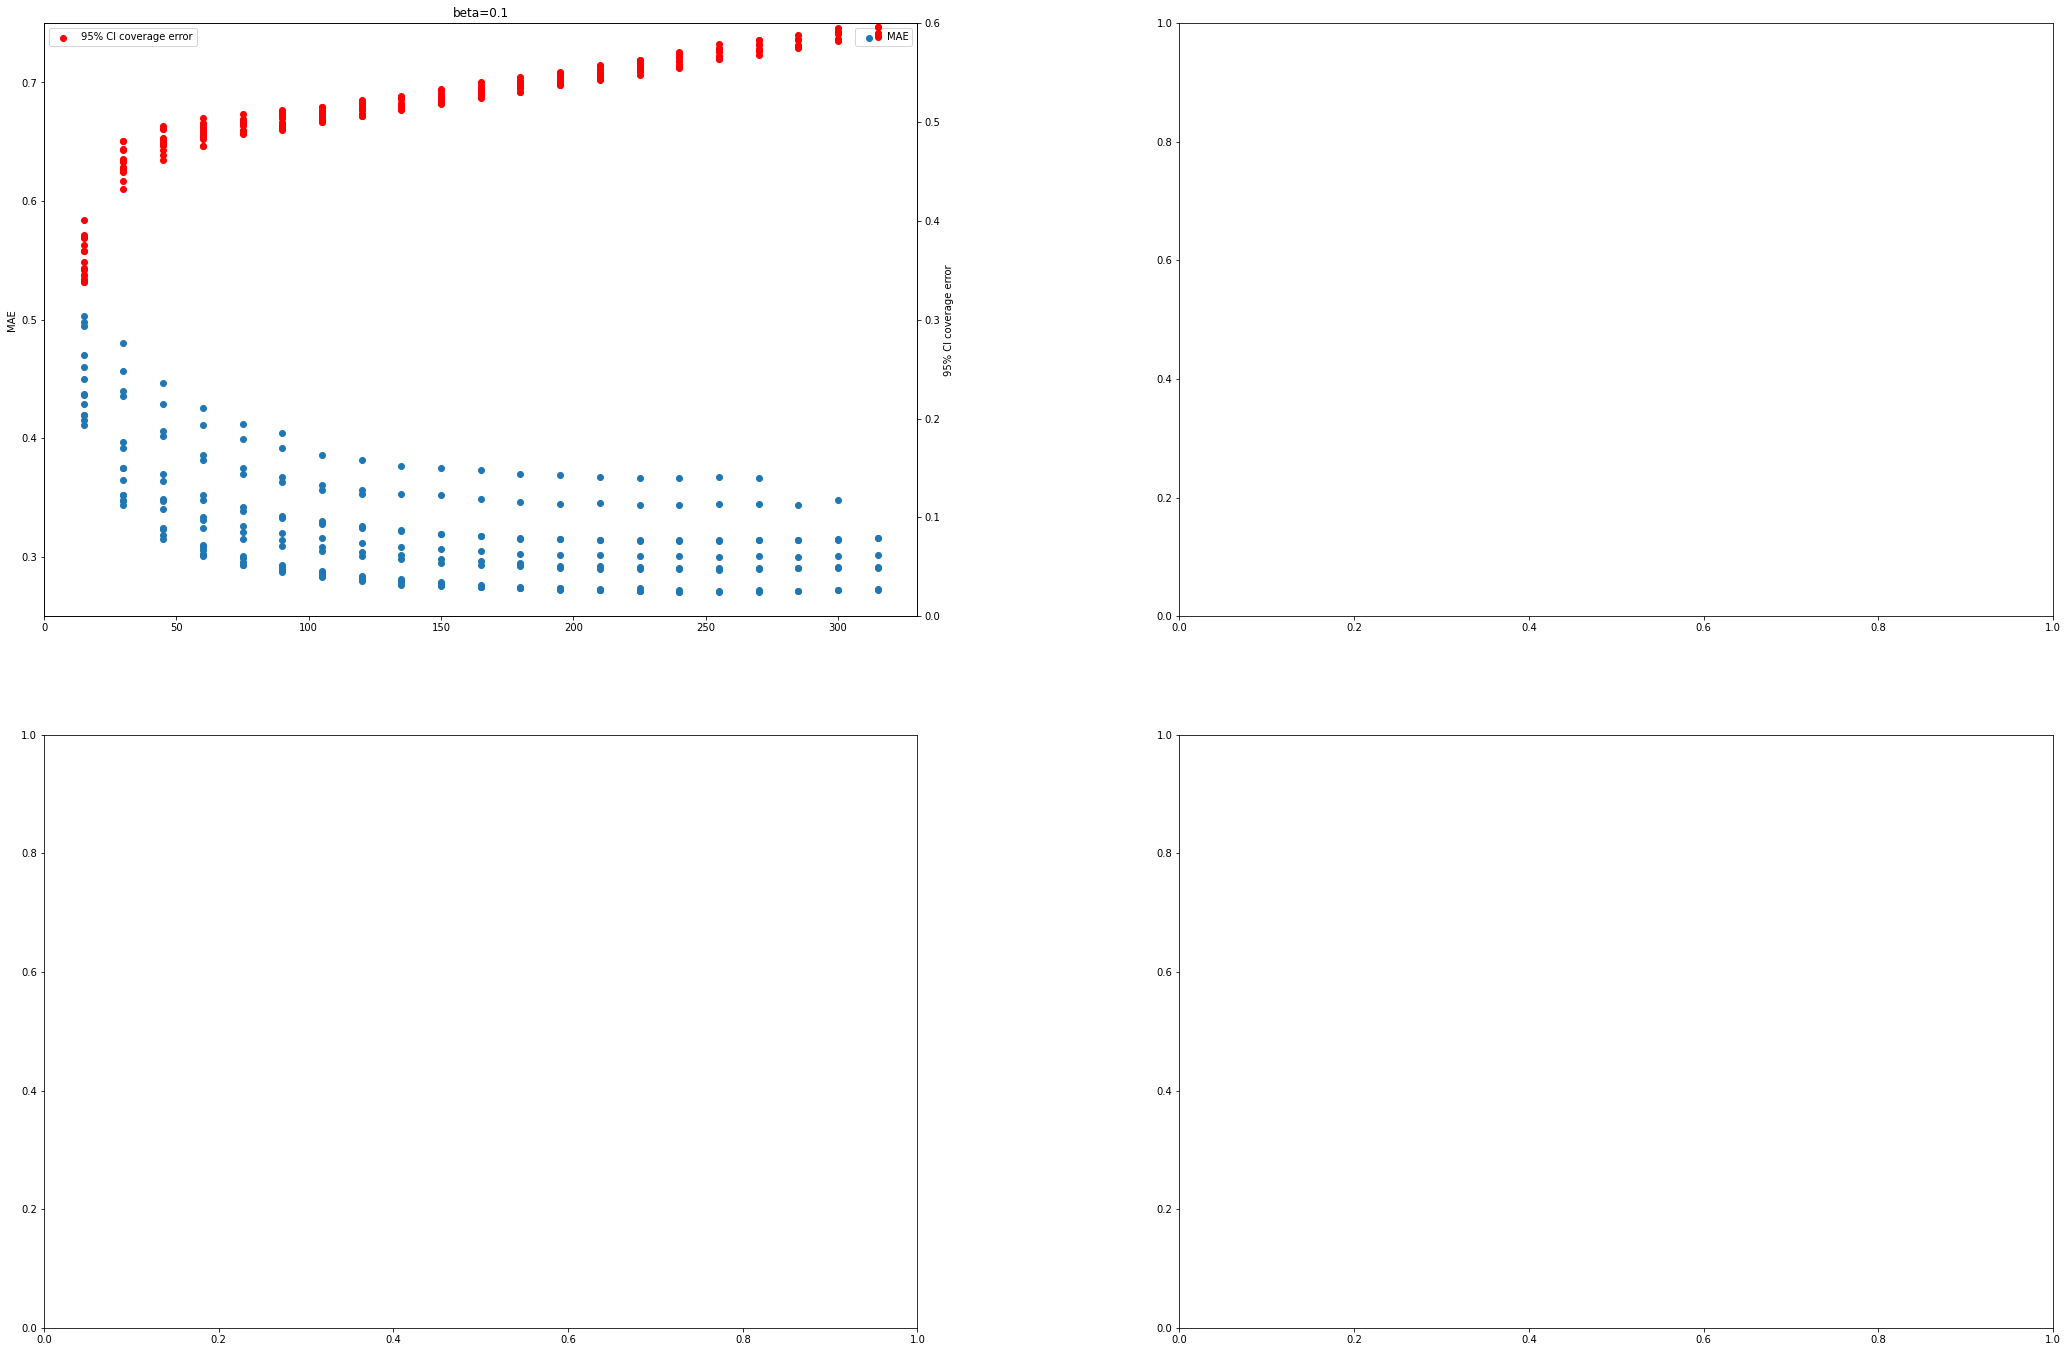

In [5]:
cols = 2
rows = 2
i = j = 0
beta = 0.1
fig, axs = plt.subplots(cols, rows, figsize=(36, 24))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

one_beta = df[df.beta==beta]
x = one_beta.epoch.values
y = one_beta.multi_mae.values
axs[i,j].set_ylim([0.25, 0.75])
axs[i,j].scatter(x,y, label='MAE')
axs[i,j].set_title('beta=' + str(beta))
ax2=axs[i,j].twinx()
ax2.set_ylim([0, 0.6])
y2 = abs(one_beta.prop_95.values - 0.95)
ax2.scatter(x, y2, c='red', label='95% CI coverage error')
axs[i,j].legend()
axs[i,j].set_ylabel('MAE')
ax2.set_ylabel('95% CI coverage error')
ax2.legend(loc='upper left')

In [20]:
df.columns

Index(['beta', 'epoch', 'mae', 'multi_mae', 'average_variance', 'prop_90',
       'prop_95', 'prop_99', 'k', 'prop_80', 'prop_80q', 'prop_90q',
       'prop_95q', 'prop_99q'],
      dtype='object')

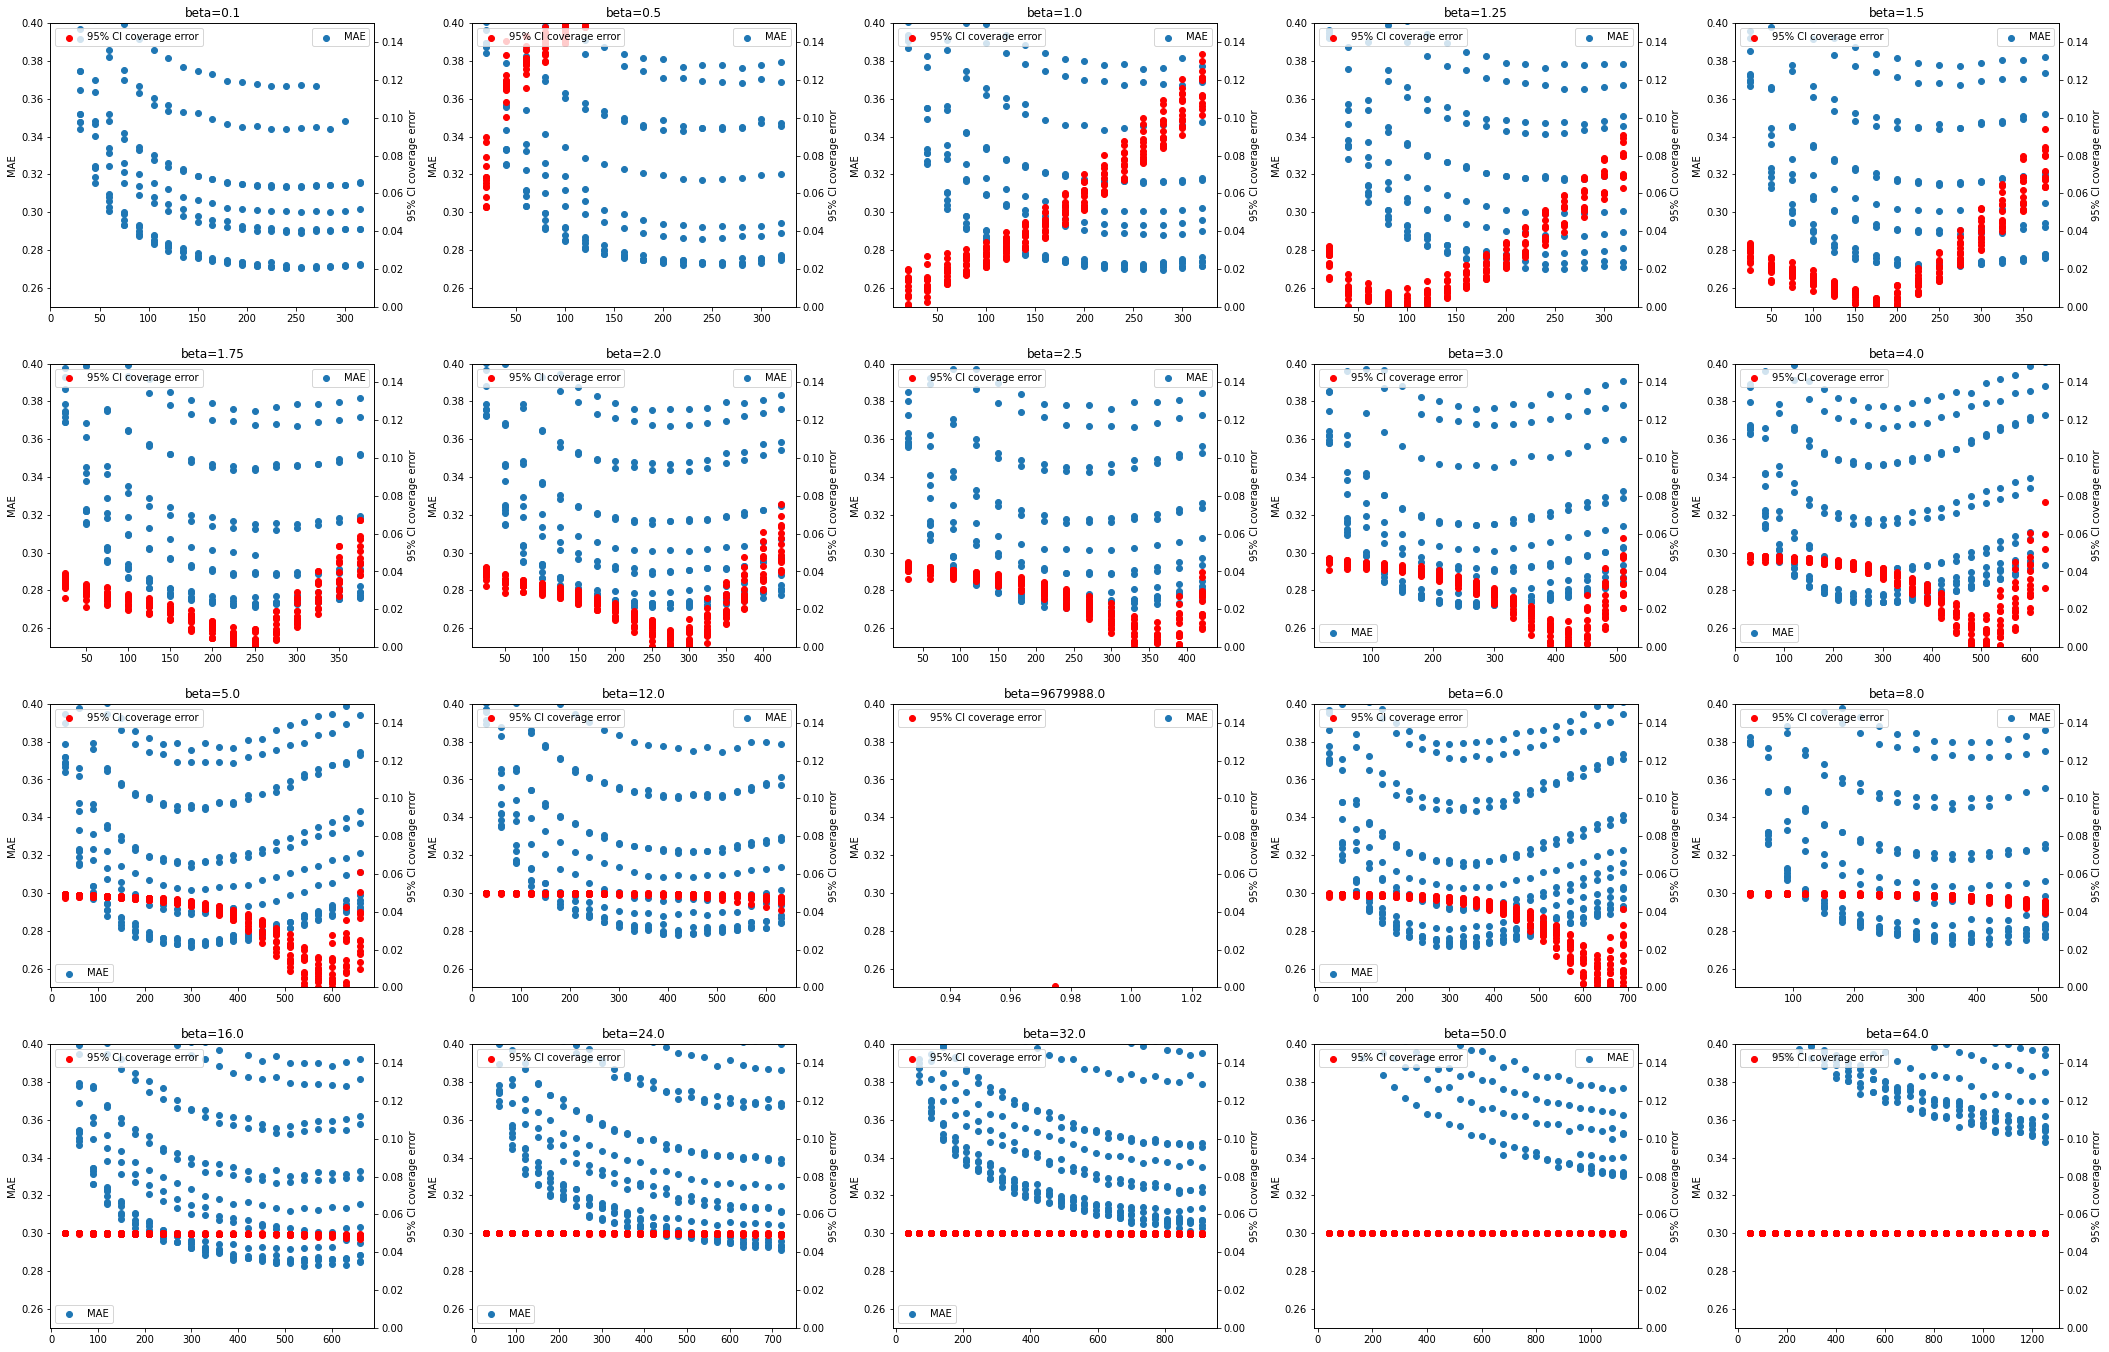

In [19]:
cols = 4
rows = 5
i = j = 0
fig, axs = plt.subplots(cols, rows, figsize=(36, 24))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

betas = df.beta.unique()
for i in range(cols):
    for j in range(rows):
        bet_ix = i * rows + j
        if bet_ix >= len(betas):
            break
        beta = betas[bet_ix]
        one_beta = df[df.beta==beta]
        x = one_beta.epoch.values
        y = one_beta.multi_mae.values
        axs[i,j].set_ylim([0.25, 0.4])
        axs[i,j].scatter(x,y, label='MAE')
        axs[i,j].set_title('beta=' + str(beta))
        ax2=axs[i,j].twinx()
        ax2.set_ylim([-0.00, 0.15])
        y2 = abs(one_beta.prop_95.values - 0.95)
        ax2.scatter(x, y2, c='red', label='95% CI coverage error')
        axs[i,j].legend()
        axs[i,j].set_ylabel('MAE')
        ax2.set_ylabel('95% CI coverage error')
        ax2.legend(loc='upper left')

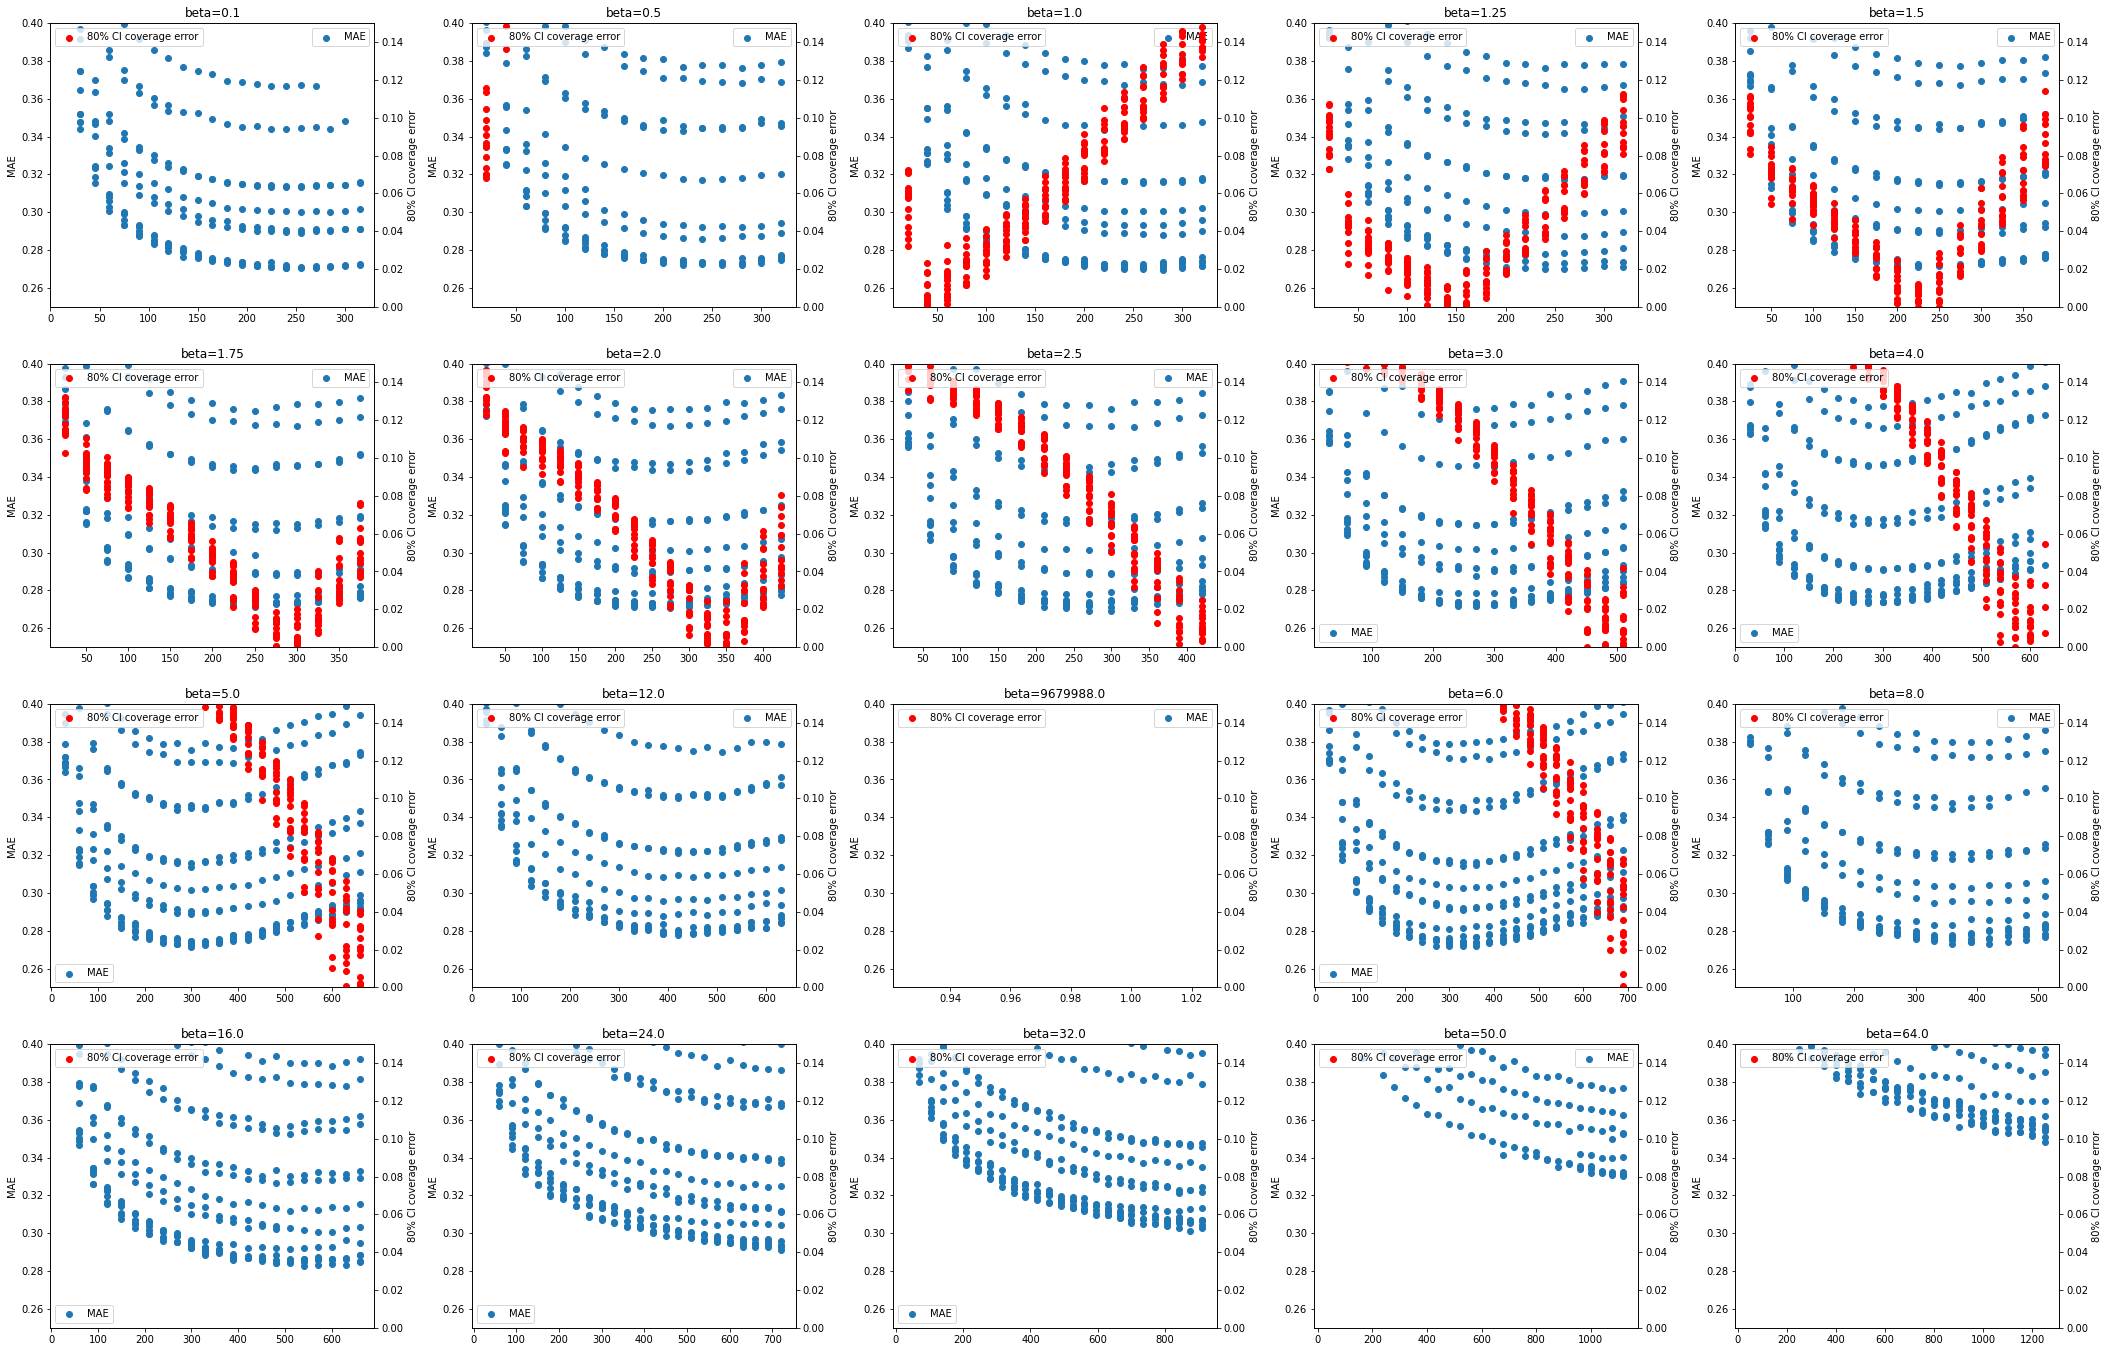

In [21]:
cols = 4
rows = 5
i = j = 0
fig, axs = plt.subplots(cols, rows, figsize=(36, 24))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

betas = df.beta.unique()
for i in range(cols):
    for j in range(rows):
        bet_ix = i * rows + j
        if bet_ix >= len(betas):
            break
        beta = betas[bet_ix]
        one_beta = df[df.beta==beta]
        x = one_beta.epoch.values
        y = one_beta.multi_mae.values
        axs[i,j].set_ylim([0.25, 0.4])
        axs[i,j].scatter(x,y, label='MAE')
        axs[i,j].set_title('beta=' + str(beta))
        ax2=axs[i,j].twinx()
        ax2.set_ylim([-0.00, 0.15])
        y2 = abs(one_beta.prop_80.values - 0.80)
        ax2.scatter(x, y2, c='red', label='80% CI coverage error')
        axs[i,j].legend()
        axs[i,j].set_ylabel('MAE')
        ax2.set_ylabel('80% CI coverage error')
        ax2.legend(loc='upper left')

In [29]:
df.drop(2361, inplace=True)

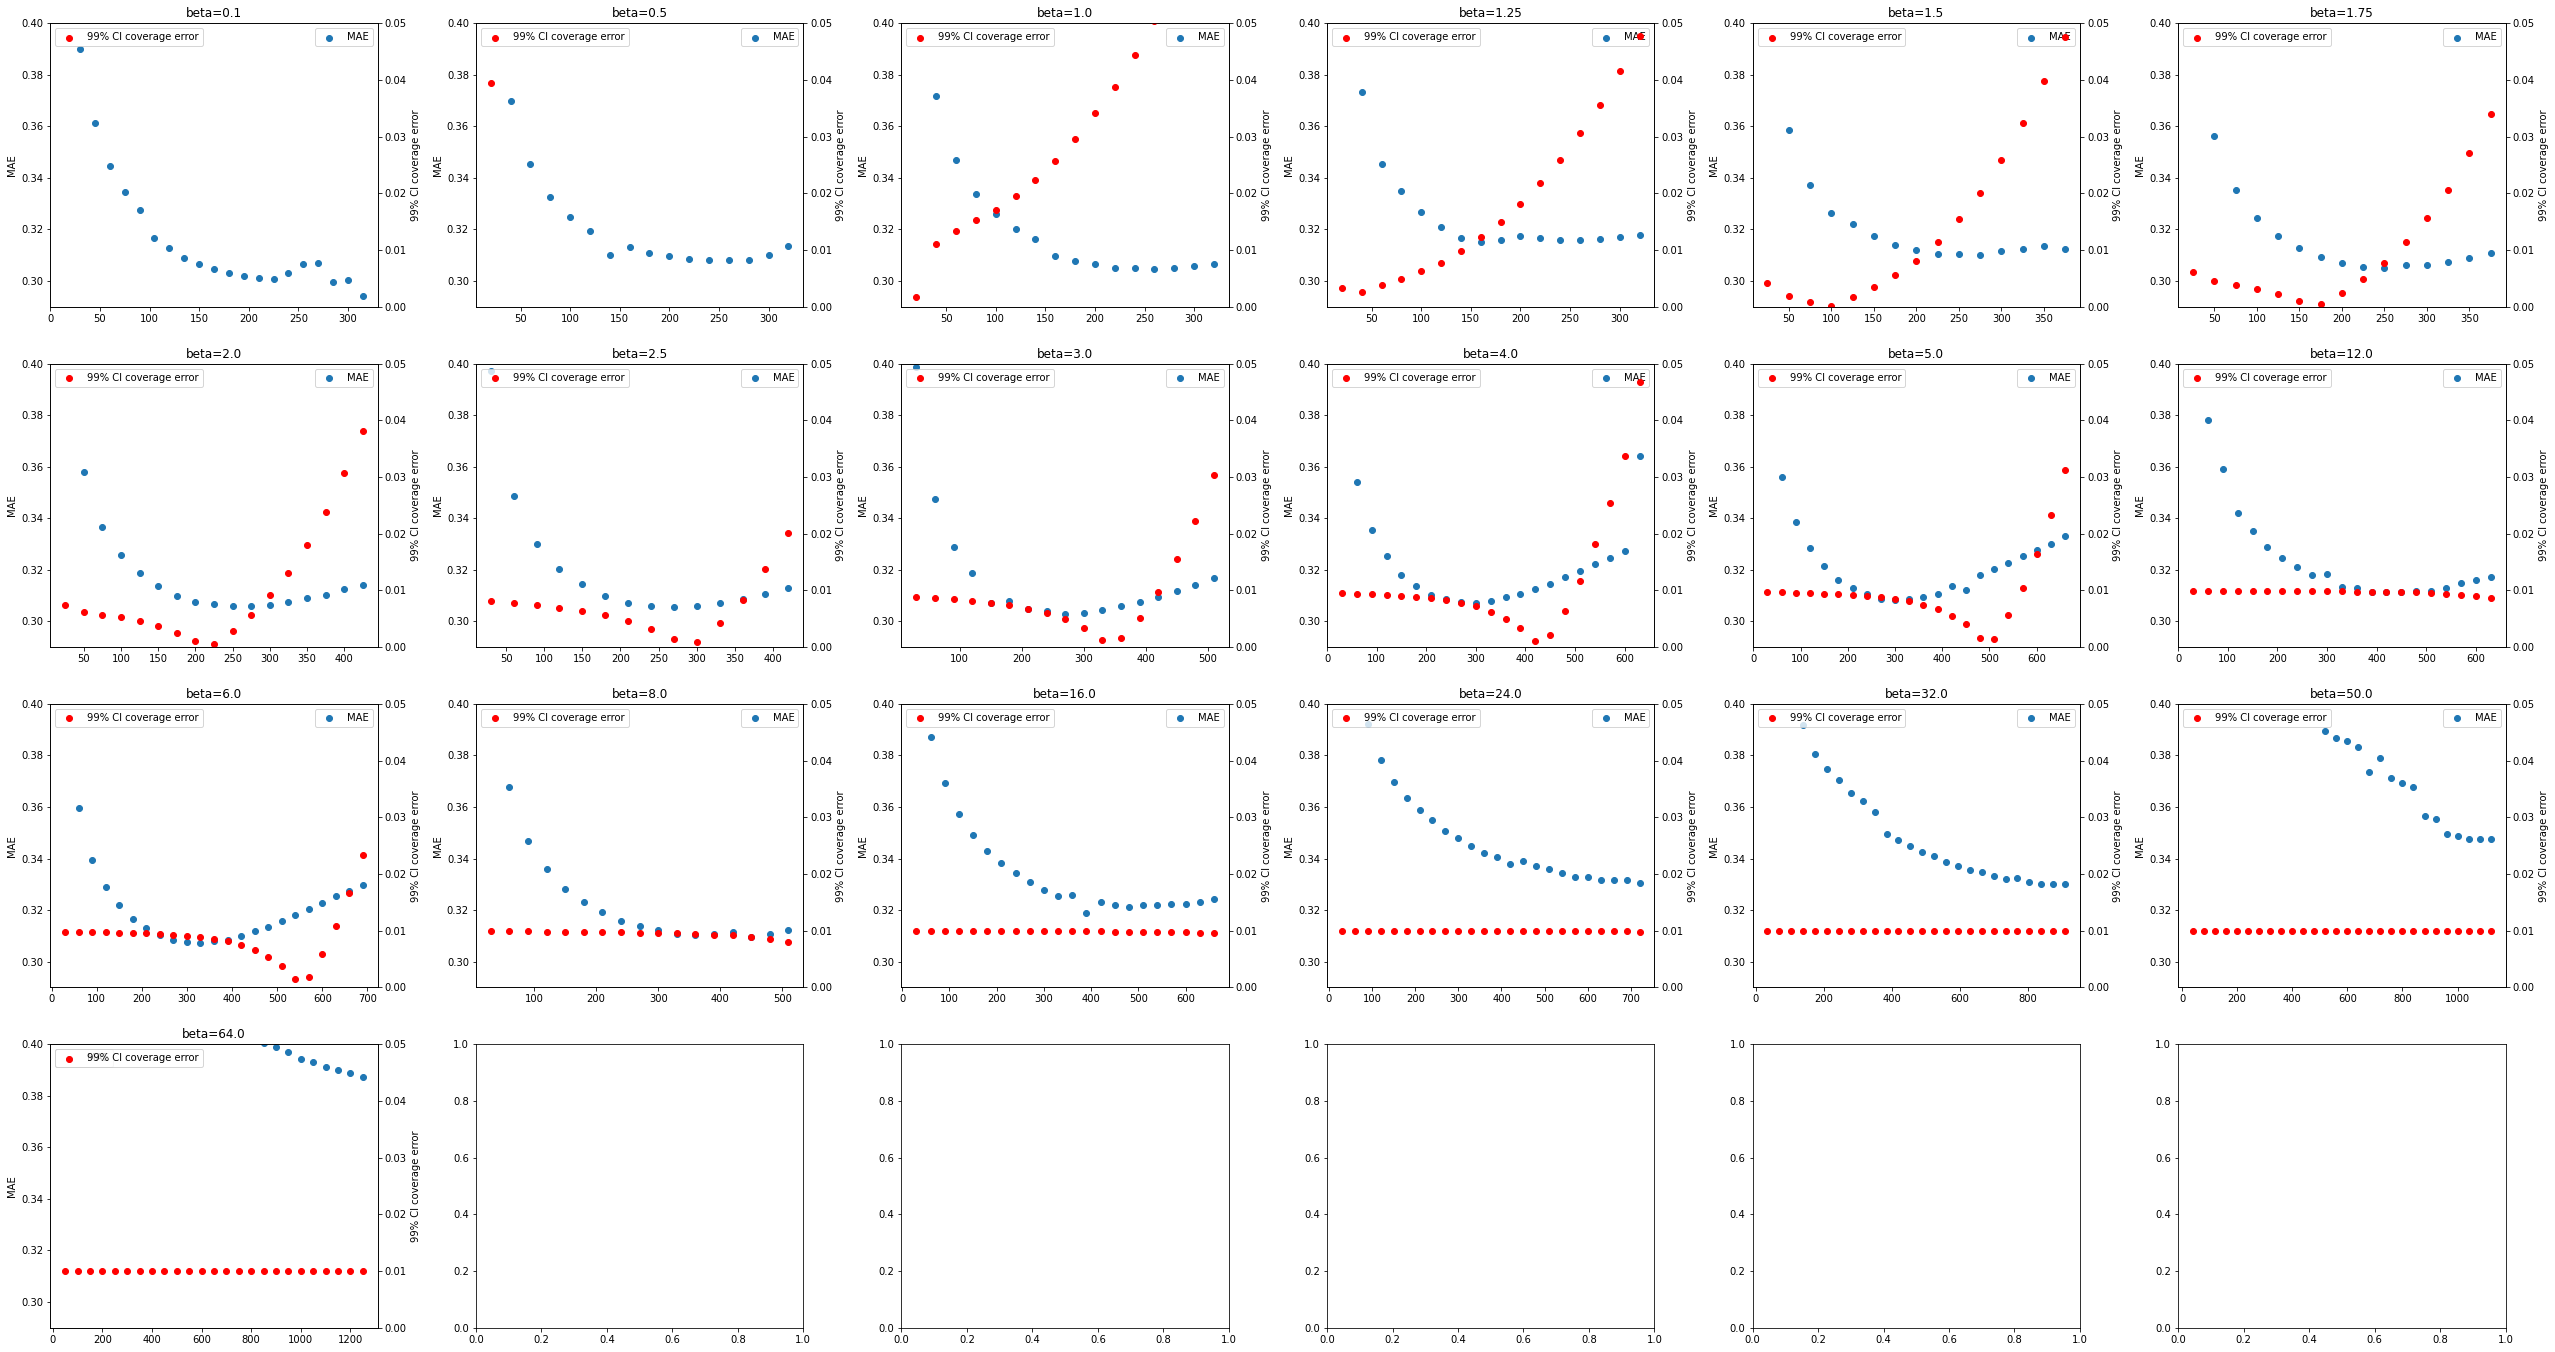

In [46]:
cols = 4
rows = 6
i = j = 0
fig, axs = plt.subplots(cols, rows, figsize=(44, 24))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

betas = df.beta.unique()
for i in range(cols):
    for j in range(rows):
        bet_ix = i * rows + j
        if bet_ix >= len(betas):
            break
        beta = betas[bet_ix]        
        one_beta = df[df.beta==beta].groupby('epoch').mean()
        one_beta['epoch'] = one_beta.index
        x = one_beta.epoch.values
        y = one_beta.multi_mae.values
        axs[i,j].set_ylim([0.29, 0.4])
        axs[i,j].scatter(x,y, label='MAE')
        axs[i,j].set_title('beta=' + str(beta))
        ax2=axs[i,j].twinx()
        ax2.set_ylim([-0.00, 0.05])
        y2 = abs(one_beta.prop_99.values - 0.99)
        ax2.scatter(x, y2, c='red', label='99% CI coverage error')
        axs[i,j].legend()
        axs[i,j].set_ylabel('MAE')
        ax2.set_ylabel('99% CI coverage error')
        ax2.legend(loc='upper left')

In [47]:
df.columns

Index(['beta', 'epoch', 'mae', 'multi_mae', 'average_variance', 'prop_90',
       'prop_95', 'prop_99', 'k', 'prop_80', 'prop_80q', 'prop_90q',
       'prop_95q', 'prop_99q'],
      dtype='object')

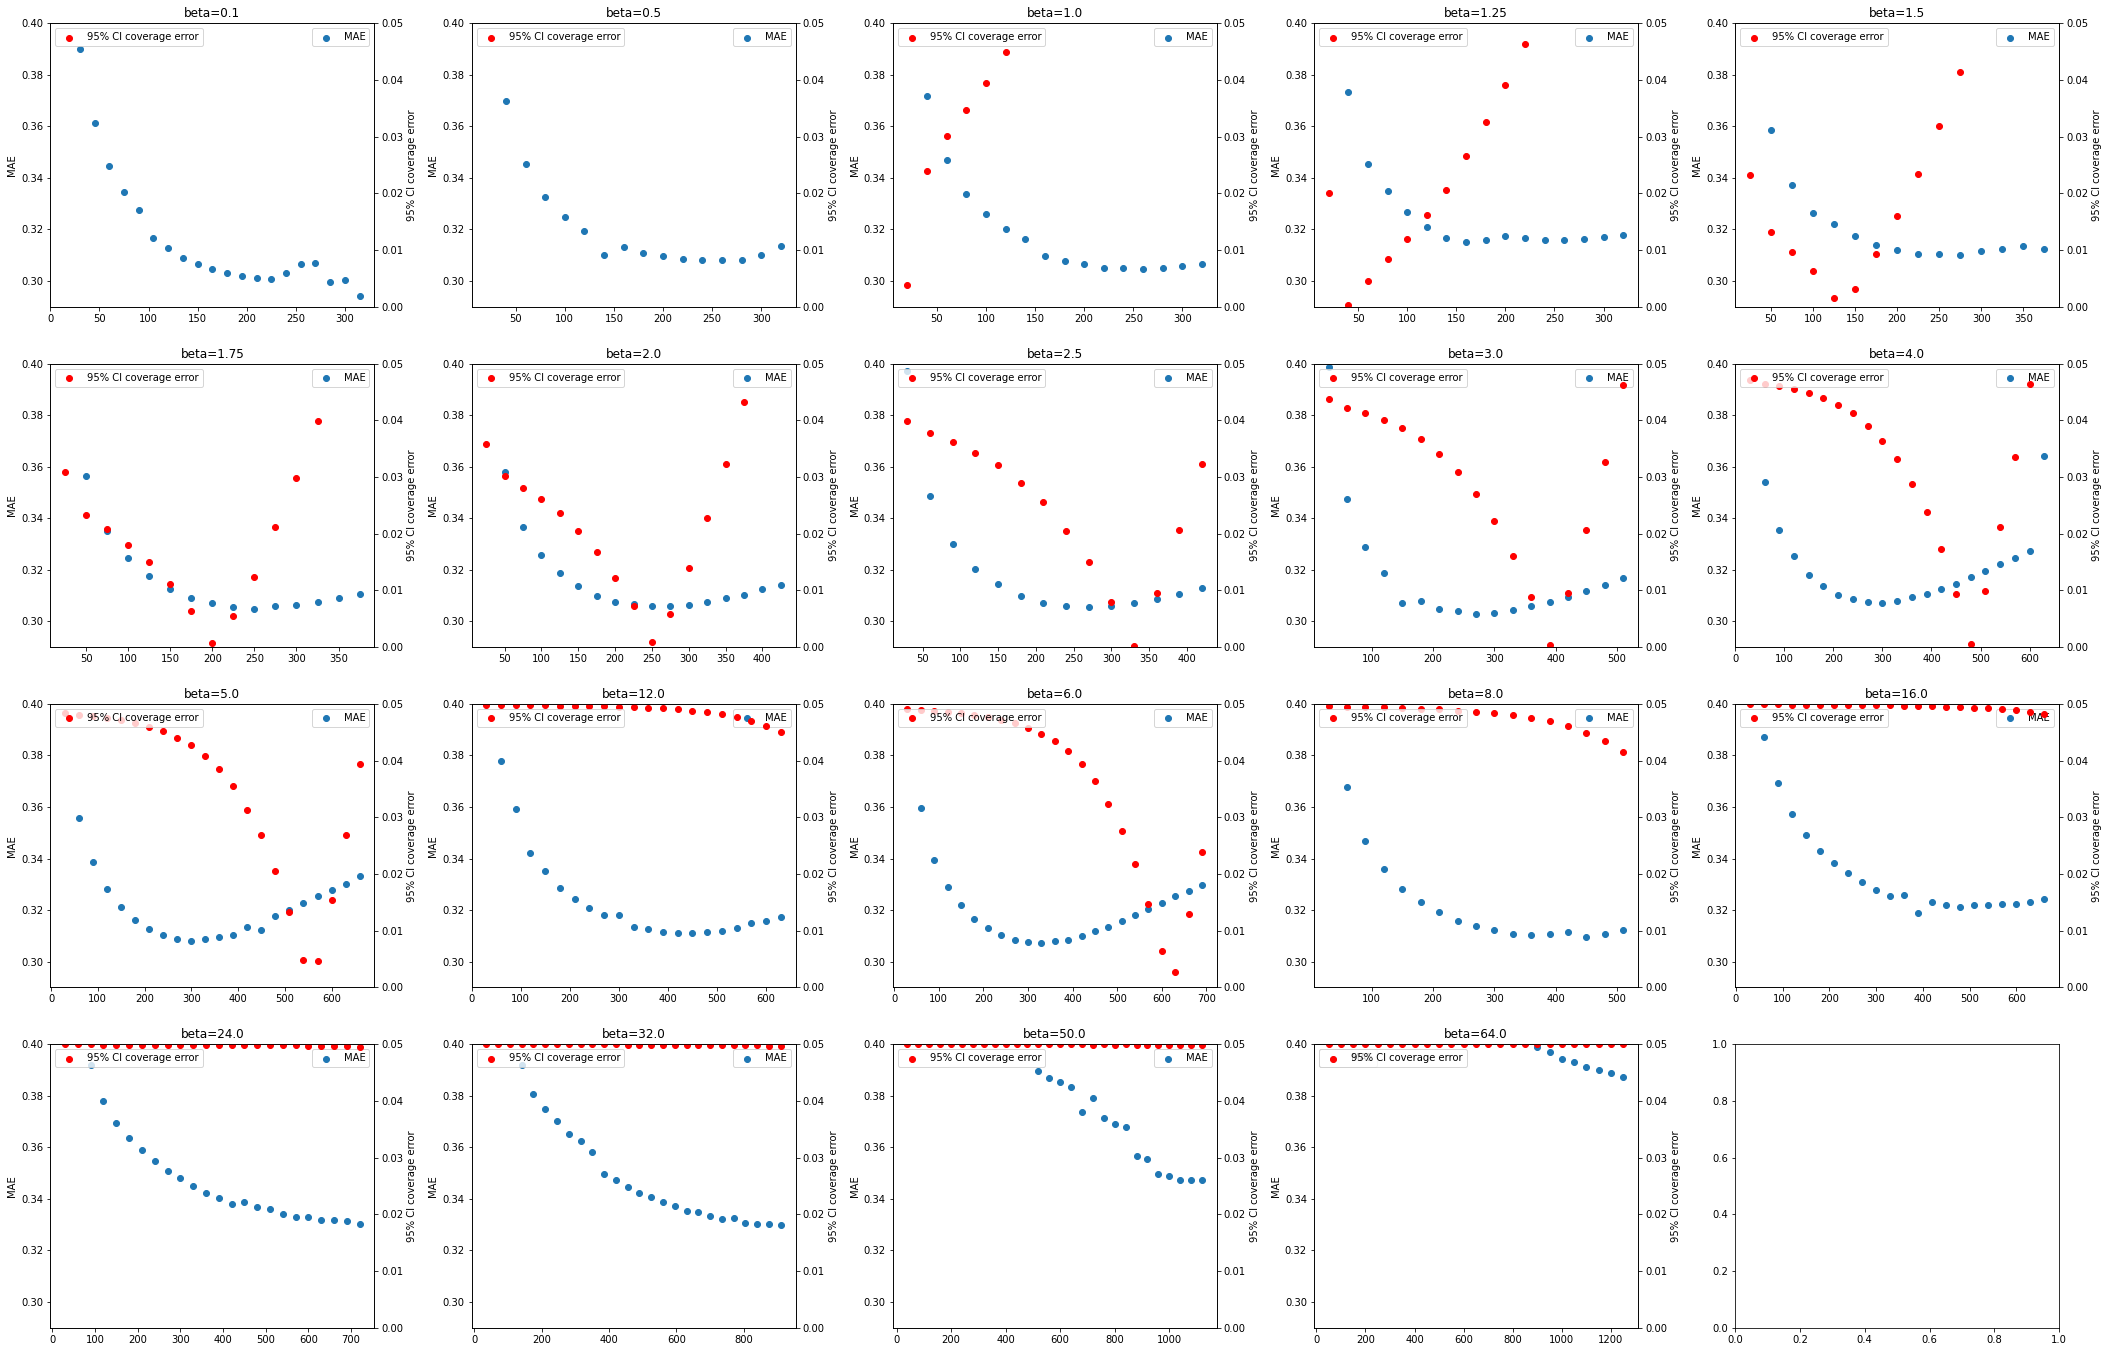

In [51]:
cols = 4
rows = 5
i = j = 0
fig, axs = plt.subplots(cols, rows, figsize=(36, 24))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)

betas = df.beta.unique()
for i in range(cols):
    for j in range(rows):
        bet_ix = i * rows + j
        if bet_ix >= len(betas):
            break
        beta = betas[bet_ix]
        one_beta = df[df.beta==beta].groupby('epoch').mean()
        one_beta['epoch'] = one_beta.index
        x = one_beta.epoch.values
        y = one_beta.multi_mae.values
        axs[i,j].set_ylim([0.29, 0.4])
        axs[i,j].scatter(x,y, label='MAE')
        axs[i,j].set_title('beta=' + str(beta))
        ax2=axs[i,j].twinx()
        ax2.set_ylim([-0.00, 0.05])
        y2 = abs(one_beta.prop_95q.values - 0.95)
        ax2.scatter(x, y2, c='red', label='95% CI coverage error')
        axs[i,j].legend()
        axs[i,j].set_ylabel('MAE')
        ax2.set_ylabel('95% CI coverage error')
        ax2.legend(loc='upper left')

In [32]:
one_beta.groupby('epoch').mean()

,beta,mae,multi_mae,average_variance,prop_90,prop_95,prop_99,k,prop_80,prop_80q,prop_90q,prop_95q,prop_99q
epoch,,,,,,,,,,,,,
15.0,0.1,0.456986,0.455829,-0.039796,0.508668,0.586251,0.713124,6.928571,0.409157,0.403678,0.498584,0.569124,0.666736
30.0,0.1,0.389583,0.389862,-0.704288,0.421137,0.491149,0.612510,6.928571,0.334672,0.330141,0.412175,0.475696,0.568225
45.0,0.1,0.360601,0.361253,-0.949514,0.402100,0.470458,0.589615,6.928571,0.318791,0.314608,0.393476,0.455537,0.545681
60.0,0.1,0.343634,0.344520,-1.093690,0.392994,0.460473,0.578477,6.928571,0.311413,0.307266,0.384770,0.445542,0.535471
75.0,0.1,0.333352,0.334444,-1.189185,0.387020,0.453268,0.570661,6.928571,0.306049,0.302076,0.378294,0.438651,0.527292
90.0,0.1,0.326377,0.327650,-1.258872,0.381677,0.447652,0.565120,6.928571,0.301887,0.297892,0.373553,0.432929,0.521363
105.0,0.1,0.315295,0.316776,-1.351835,0.377156,0.442558,0.559170,7.384615,0.298148,0.294109,0.368849,0.428328,0.515954
120.0,0.1,0.311284,0.312969,-1.407543,0.372101,0.436496,0.552470,7.384615,0.293981,0.290185,0.364210,0.422458,0.509473
135.0,0.1,0.307094,0.308984,-1.459285,0.368230,0.432436,0.545984,7.545455,0.291243,0.287409,0.360422,0.418258,0.503749


# Cross validation plot for the paper

In [22]:
theme_bw = "theme_bw.mplstyle"
plt.style.use(theme_bw)

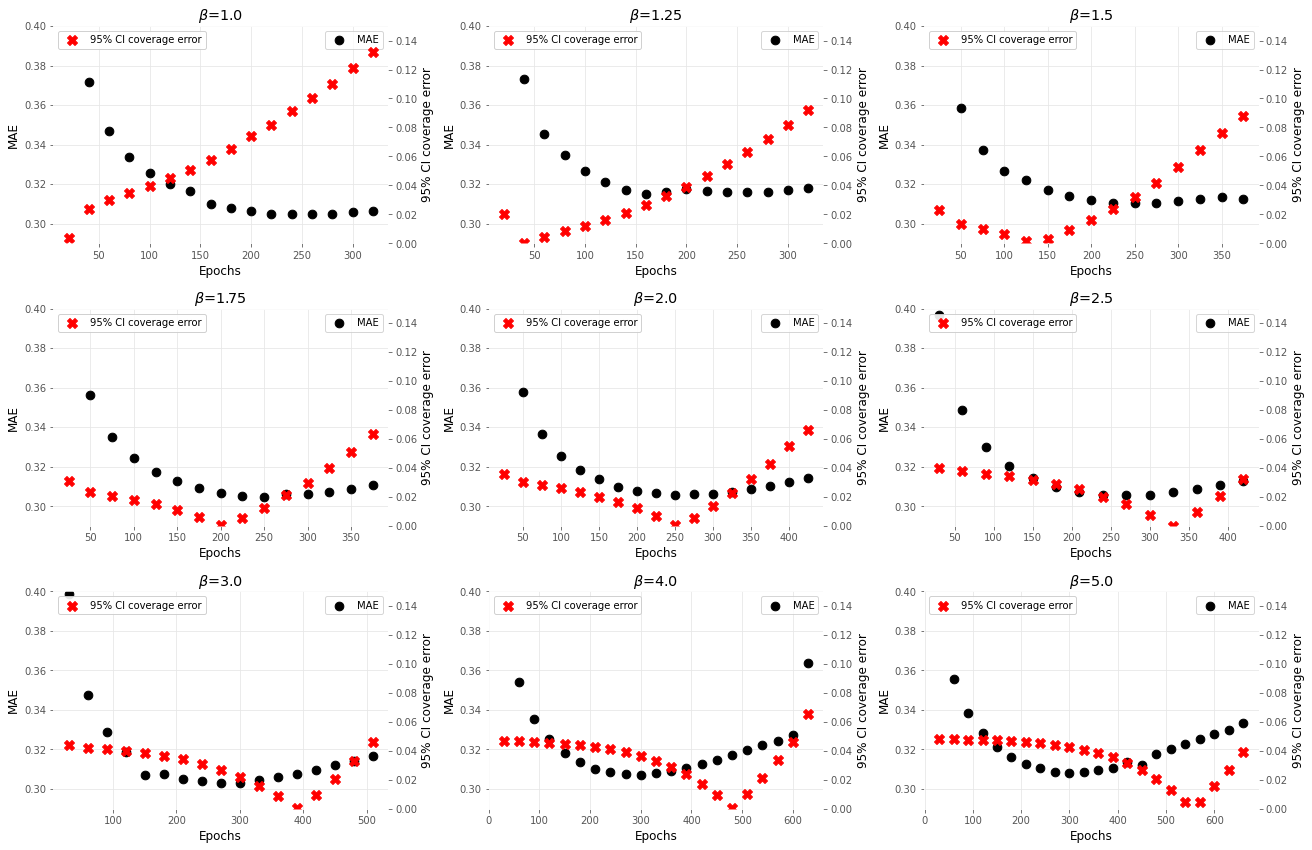

In [42]:
cols = 3
rows = 3
i = j = 0
fig, axs = plt.subplots(cols, rows, figsize=(21.6, 14.4))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

betas = [1.0, 1.25, 1.5, 1.75, 2.0, 2.5, 3.0, 4.0, 5.0]
for i in range(cols):
    for j in range(rows):
        bet_ix = i * rows + j
        if bet_ix >= len(betas):
            break
        beta = betas[bet_ix]
        one_beta = df[df.beta==beta].groupby('epoch').mean()
        one_beta['epoch'] = one_beta.index
        x = one_beta.epoch.values
        y = one_beta.multi_mae.values
        axs[i,j].set_ylim([0.29, 0.4])
        axs[i,j].scatter(x,y, label='MAE', s=75, marker='o', c='black')
#         axs[i,j].set_title('beta=' + str(beta))
        axs[i,j].set_title(r'$\beta$=' + str(beta))
        ax2=axs[i,j].twinx()
        ax2.set_ylim([-0.00, 0.15])
        ax2.grid(False)
        y2 = abs(one_beta.prop_95q.values - 0.95)
        ax2.scatter(x, y2, c='red', label='95% CI coverage error', marker='X', s=100)
        axs[i,j].legend()
        axs[i,j].set_ylabel('MAE')
        axs[i,j].set_xlabel('Epochs')
        ax2.set_ylabel('95% CI coverage error')
        ax2.legend(loc='upper left', framealpha=0.9)